In [25]:
import requests as req
import pandas as pd
from config_local import census_api
from census import Census

In [26]:
# read places 
xls = pd.ExcelFile('Project1_AmazonSites.xlsx') 
places_df=xls.parse('AmazonCities', dtype=str) 

In [27]:
places = places_df[['PlaceCode','StateCode']]
places


,PlaceCode,StateCode
0,50000,11
1,51000,36
2,07000,25
3,14000,17
4,44000,06
5,55000,37
6,05000,48
7,04000,13


In [28]:
codes_df = xls.parse('CensusFields',parse_cols=1)

In [29]:
c = Census(census_api, year=2016)

In [30]:
home_rent =[]

In [31]:
for p in places.values:
    place_state = {'for':'place:'+ str(p[0]),'in':'state:'+str(p[1])}
    census_data = c.acs5.get(("NAME", "B25077_001E", "B25064_001E", "B01003_001E",
                              "B19013_001E", "B25105_001E","B25004_004E","B25004_002E"
                              ), 
                             place_state)
    print(census_data)
    home_rent.append({'NAME':census_data[0]['NAME'],
                     'Median home value':census_data[0]['B25077_001E'],
                     'Median gross rent':census_data[0]['B25064_001E'],
                     'Population':census_data[0]['B01003_001E'],
                     'Income':census_data[0]['B19013_001E'],
                     'Median Mortgage Cost':census_data[0]['B25105_001E'],
                     'Homeowner Vacancy Rate':census_data[0]['B25004_004E'],
                     'Rental Vacancy Rate':census_data[0]['B25004_002E']
                     })
    #time.sleep(10)
print(home_rent)    
    

[{'NAME': 'Washington city, District of Columbia', 'B25077_001E': 506100.0, 'B25064_001E': 1362.0, 'B01003_001E': 659009.0, 'B19013_001E': 72935.0, 'B25105_001E': 1539.0, 'B25004_004E': 2000.0, 'B25004_002E': 10256.0, 'state': '11', 'place': '50000'}]
[{'NAME': 'New York city, New York', 'B25077_001E': 508900.0, 'B25064_001E': 1294.0, 'B01003_001E': 8461961.0, 'B19013_001E': 55191.0, 'B25105_001E': 1362.0, 'B25004_004E': 19855.0, 'B25004_002E': 76655.0, 'state': '36', 'place': '51000'}]
[{'NAME': 'Boston city, Massachusetts', 'B25077_001E': 423200.0, 'B25064_001E': 1369.0, 'B01003_001E': 658279.0, 'B19013_001E': 58516.0, 'B25105_001E': 1518.0, 'B25004_004E': 1136.0, 'B25004_002E': 5576.0, 'state': '25', 'place': '07000'}]
[{'NAME': 'Chicago city, Illinois', 'B25077_001E': 225200.0, 'B25064_001E': 987.0, 'B01003_001E': 2714017.0, 'B19013_001E': 50434.0, 'B25105_001E': 1138.0, 'B25004_004E': 13417.0, 'B25004_002E': 40067.0, 'state': '17', 'place': '14000'}]
[{'NAME': 'Los Angeles city, C

In [32]:
#get dataframe
housing_df = pd.DataFrame(home_rent)
housing_df

,Homeowner Vacancy Rate,Income,Median Mortgage Cost,Median gross rent,Median home value,NAME,Population,Rental Vacancy Rate
0,2000.0,72935.0,1539.0,1362.0,506100.0,"Washington city, District of Columbia",659009.0,10256.0
1,19855.0,55191.0,1362.0,1294.0,508900.0,"New York city, New York",8461961.0,76655.0
2,1136.0,58516.0,1518.0,1369.0,423200.0,"Boston city, Massachusetts",658279.0,5576.0
3,13417.0,50434.0,1138.0,987.0,225200.0,"Chicago city, Illinois",2714017.0,40067.0
4,5401.0,51538.0,1410.0,1241.0,496300.0,"Los Angeles city, California",3918872.0,30057.0
5,1606.0,58641.0,1081.0,966.0,218200.0,"Raleigh city, North Carolina",441326.0,5241.0
6,1872.0,60939.0,1215.0,1106.0,257800.0,"Austin city, Texas",907779.0,11621.0
7,2735.0,49398.0,1112.0,998.0,222300.0,"Atlanta city, Georgia",456378.0,9829.0


In [33]:
# Estimate affordable housing cost/income
housing_df['home owner afford'] = (12*housing_df['Median Mortgage Cost'])/housing_df['Income']
housing_df['rent afford'] = (12*housing_df['Median gross rent'])/housing_df['Income']

In [34]:
housing_df
housing_df.to_csv("housing.csv")

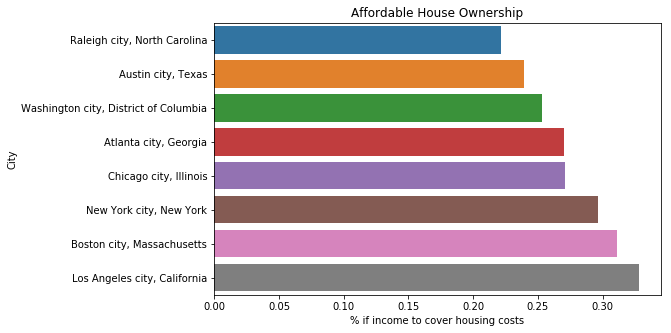

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
housing_df = pd.read_csv("housing.csv")

plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('home owner afford')
sns.barplot(y='City',x='home owner afford',data=housing_df)
plt.xlabel("% if income to cover housing costs")

plt.title("Affordable House Ownership")
plt.savefig("affordhouse.png")
plt.show()


In [15]:
ranking_own = pd.DataFrame(housing_df['City'])
ranking_own=ranking_own.rename(columns={'City':'Housing Owner Affordability'})
ranking_own


,Housing Owner Affordability
5,"Raleigh city, North Carolina"
6,"Austin city, Texas"
0,"Washington city, District of Columbia"
7,"Atlanta city, Georgia"
3,"Chicago city, Illinois"
1,"New York city, New York"
2,"Boston city, Massachusetts"
4,"Los Angeles city, California"


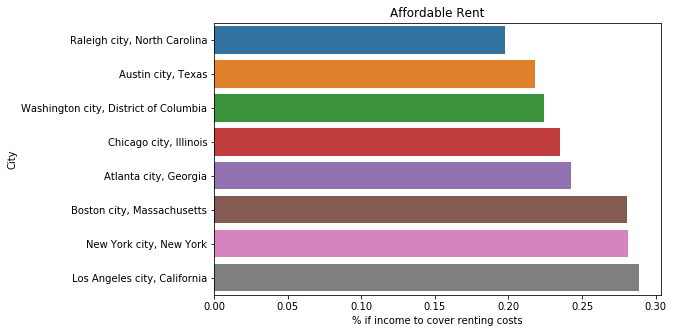

In [16]:
plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('rent afford')
sns.barplot(y='City',x='rent afford',data=housing_df)
plt.xlabel("% if income to cover renting costs")
plt.title("Affordable Rent")
plt.savefig("affordrent.png")
plt.show()

In [18]:
ranking_rent = pd.DataFrame(housing_df['City'])
ranking_rent=ranking_rent.rename(columns={'City':'Rent Affordability'})
ranking_rent

,Rent Affordability
5,"Raleigh city, North Carolina"
6,"Austin city, Texas"
0,"Washington city, District of Columbia"
3,"Chicago city, Illinois"
7,"Atlanta city, Georgia"
2,"Boston city, Massachusetts"
1,"New York city, New York"
4,"Los Angeles city, California"
